In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target

In [2]:
from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, test_size=0.2, train_size=0.8,
                  random_state=0)
train_index, test_index = next(ss.split(X, y))
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]


In [3]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()

clf.fit(X_train, y_train)


/home/ma/.bin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
clf.score(X_test, y_test)

0.9473684210526315

In [5]:
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [6]:
accuracy_score(y_test, y_pred)


0.9473684210526315

In [7]:
cmat = confusion_matrix(y_test, y_pred)
cmat

array([[45,  2],
       [ 4, 63]])

In [8]:
clf.decision_function(X_test[12:15])


array([ 5.79827319, -1.87127993,  1.58335698])

In [13]:
clf.predict(X_test[12:15])

array([1, 0, 1])

In [14]:
(clf.decision_function(X_test[12:15]) > 0 ).astype(int)

array([1, 0, 1])

In [15]:
for th in range(-3,7):
    print(th,(clf.decision_function(X_test[12:15]) > th).astype(int))

-3 [1 1 1]
-2 [1 1 1]
-1 [1 0 1]
0 [1 0 1]
1 [1 0 1]
2 [1 0 0]
3 [1 0 0]
4 [1 0 0]
5 [1 0 0]
6 [0 0 0]


In [16]:
from sklearn.metrics import roc_curve, auc, average_precision_score, precision_recall_curve, precision_recall_fscore_support

In [17]:
test_score = clf.decision_function(X_test)

AUC=  0.9936487773896475


Text(0.5, 0, 'False Positive Rate (1-specificity)')

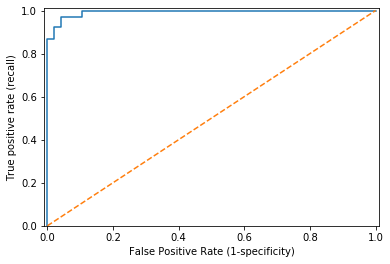

In [18]:
fpr, tpr, th = roc_curve(y_test, test_score)
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
print("AUC= ", auc(fpr, tpr))

plt.plot([0,1],[0,1], linestyle='--')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('True positive rate (recall)')
plt.xlabel('False Positive Rate (1-specificity)')

Text(0.5, 0, 'Recall')

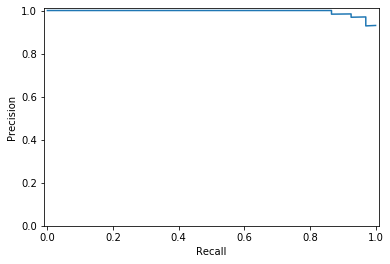

In [20]:
test_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision)

plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])
plt.ylabel('Precision')
plt.xlabel('Recall')

result AUC =  0.9936487773896475
chance AUC =  0.5208002540489044
prefect AUC =  1.0


(0.0, 1.01)

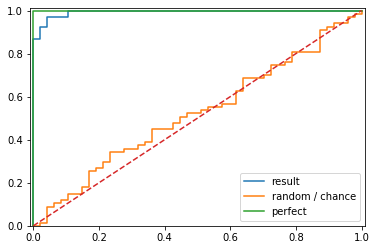

In [19]:
test_score = clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label='result')
print("result AUC = ", auc(fpr, tpr))

test_score = np.random.uniform(size=y_test.size)
fpr, tpr, _ = roc_curve(y_test, test_score)
plt.plot(fpr, tpr, label="random / chance")
print("chance AUC = ", auc(fpr, tpr))

fpr, tpr, _ = roc_curve(y_test, y_test)
plt.plot(fpr, tpr, label='perfect')
print("prefect AUC = ", auc(fpr, tpr))
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend(loc='best')
plt.xlim([-0.01, 1.01])
plt.ylim([0.0, 1.01])

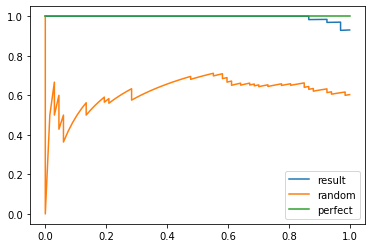

In [22]:
test_score = clf.decision_function(X_test)
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label="result")

test_score = np.random.uniform(size=y_test.size)
precision, recall, _ = precision_recall_curve(y_test, test_score)
plt.plot(recall, precision, label='random')

precision, recall, _ = precision_recall_curve(y_test, y_test)
plt.plot(recall, precision, label='perfect')

plt.legend(loc='best')


In [21]:
test_score = np.random.uniform(size=y_test.size)
precision, recall, th = precision_recall_curve(y_test, test_score)

precision_interp = np.maximum.accumulate(precision)